- When to Use One-Hot Encoding vs. Label Encoding:

**Label Encoding:**
- Use Case: It’s best suited for ordinal categorical variables where the categories have a meaningful order (like your 'Risk' column with 'Low', 'Intermediate', 'High').
- Why: Label encoding assigns an integer to each category, which preserves the ordinal relationship between them. However, it can introduce unintended relationships in nominal (non-ordinal) data, where the categories don't have a meaningful order.

**One-Hot Encoding:**
- Use Case: It’s typically used for nominal categorical variables where there is no inherent order among the categories (like 'Gender', 'Smoking', etc.).
- Why: One-hot encoding creates binary columns for each category, ensuring that the machine learning model doesn't assume any order among the categories. This is especially useful when working with algorithms that rely on distance metrics (like k-nearest neighbors or linear models).

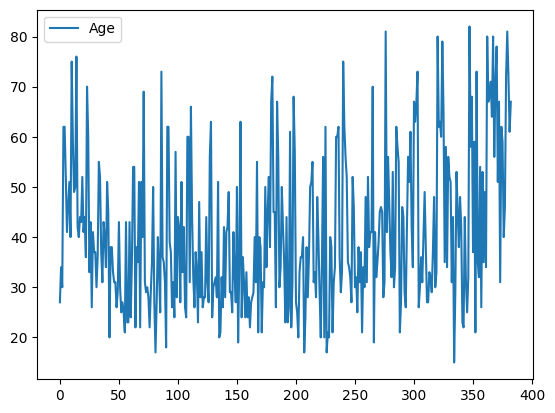

In [2]:
#keep='first': Only the first occurrence of duplicates is False, the rest are True.
#keep='last': Only the last occurrence of duplicates is False, the rest are True.
#keep=False: All occurrences of duplicates are True.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
thyroid=pd.read_csv('Thyroid_Diff.csv')
#thyroid.head()
#print(thyroid.duplicated(keep="first"))
#thyroid.drop_duplicates(inplace=True)
#thyroid
#383 rows × 17 columns
thyroid.plot()
plt.show()

In [3]:
thyroid2=thyroid.copy()
print(thyroid2.duplicated(keep="first").sum())
thyroid2.drop_duplicates(inplace=True)
List=[]
for id in range(10,10+2*len(thyroid2),2):
    List.append(id)
thyroid2["patient id"]=List
thyroid2.set_index("patient id",inplace=True)
thyroid2.head()

19


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
patient id,,,,,,,,,,,,,,,,,
10,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
12,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
14,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
16,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
18,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [4]:
#thyroid2['Focality'].unique()
#thyroid2['Response'].unique()

In [5]:
#cat_colm=thyroid2.select_dtypes(include="object") #.columns
#cat_colm
nominal_col=['Gender','Smoking','Hx Smoking','Hx Radiothreapy','Thyroid Function','Physical Examination', 'Adenopathy','Pathology' ,'Recurred']
for col in nominal_col:
    thyroid2[col]=pd.factorize(thyroid2[col])[0]
    
    # Define the mappings for each ordinal column
focal_mapping = {'Uni-Focal': 1, 'Multi-Focal': 2}
rsk_mapping = {'Low':1, 'Intermediate':2, 'High':3}

t_mapping = {'T1a':1, 'T1b':2, 'T2':3, 'T3a':4, 'T3b':5, 'T4a':6, 'T4b':7} 

n_mapping = {'N0': 1, 'N1a': 2, 'N1b': 3} 

m_mapping = {'M0': 1, 'M1': 2}  

stg_mapping = {'I': 1,'II': 2,'III': 3,'IVA': 4,'IVB': 5}  

rspnse_mapping={ 'Excellent': 1, 'Indeterminate': 2, 'Biochemical Incomplete': 3, 'Structural Incomplete': 4}

# Applying the mappings to the ordinal columns
thyroid2['Focality'] = thyroid2['Focality'].map(focal_mapping)
thyroid2['Risk'] = thyroid2['Risk'].map(rsk_mapping)
thyroid2['T'] = thyroid2['T'].map(t_mapping)
thyroid2['N'] = thyroid2['N'].map(n_mapping)
thyroid2['M'] = thyroid2['M'].map(m_mapping)
thyroid2['Stage'] = thyroid2['Stage'].map(stg_mapping)
thyroid2['Response']=thyroid2['Response'].map(rspnse_mapping)

thyroid2

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
patient id,,,,,,,,,,,,,,,,,
10,27,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,0
12,34,0,0,1,0,0,1,0,0,1,1,1,1,1,1,1,0
14,30,0,0,0,0,0,2,0,0,1,1,1,1,1,1,1,0
16,62,0,0,0,0,0,2,0,0,1,1,1,1,1,1,1,0
18,62,0,0,0,0,0,1,0,0,2,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,72,1,1,1,1,0,2,1,1,1,3,7,3,2,5,3,1
730,81,1,1,0,1,0,1,2,1,2,3,7,3,2,5,4,1
732,72,1,1,1,0,0,1,4,1,2,3,7,3,2,5,4,1


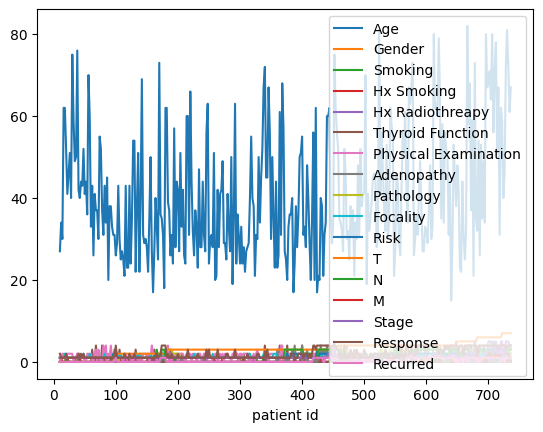

In [6]:
thyroid2.plot()
plt.show()

In [7]:
# 1 highly +ve correlated 
# -1 highly -ve correlated
# 0 or near to 0 means not correlated
#-------- Range From .5/.6 to 1  means highly positively correlated & we mostly denote it & write in different parameters
#-------- Range from -.6 to -1  means highly negatively Correlated
#-------- But between values which are near to 0 are mostly ignored bur depends on our dataset
#-------- Range from .4 to .5 means moderately positively correlated
cor1=thyroid2.corr(method='spearman') # For non-guassian distribution, which does not have normal distribution
cor1

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
Age,1.000000,0.157949,0.252296,0.102665,0.117405,-0.002246,-0.085784,0.060196,0.024256,0.203682,0.223920,0.191629,0.021143,0.194338,0.494981,0.231488,0.205828
Gender,0.157949,1.000000,0.618390,0.170124,0.233975,0.043531,-0.147205,0.242986,0.089862,0.193086,0.275244,0.239206,0.218226,0.207512,0.251765,0.292496,0.317731
Smoking,0.252296,0.618390,1.000000,0.248622,0.296427,0.004317,-0.181478,0.239511,0.234792,0.227818,0.320892,0.318754,0.183449,0.318424,0.415810,0.317164,0.325300
Hx Smoking,0.102665,0.170124,0.248622,1.000000,0.259860,0.123690,0.058424,0.112331,0.060109,-0.009836,0.105665,0.112816,0.031631,0.124370,0.200155,0.099808,0.128472
Hx Radiothreapy,0.117405,0.233975,0.296427,0.259860,1.000000,0.048756,-0.029524,0.076932,0.115010,0.098605,0.207702,0.142431,0.086390,0.429394,0.317979,0.140151,0.171796
Thyroid Function,-0.002246,0.043531,0.004317,0.123690,0.048756,1.000000,0.100089,-0.056043,-0.020372,0.005017,-0.007968,-0.045159,-0.033851,-0.018391,0.056807,-0.084035,-0.084154
Physical Examination,-0.085784,-0.147205,-0.181478,0.058424,-0.029524,0.100089,1.000000,-0.091750,-0.121040,-0.184992,-0.106654,-0.189489,-0.052800,-0.138826,-0.097670,-0.135801,-0.102818
Adenopathy,0.060196,0.242986,0.239511,0.112331,0.076932,-0.056043,-0.091750,1.000000,0.098503,0.350859,0.680456,0.474439,0.854598,0.200126,0.324907,0.600341,0.626775
Pathology,0.024256,0.089862,0.234792,0.060109,0.115010,-0.020372,-0.121040,0.098503,1.000000,0.217632,0.237347,0.551606,0.056614,0.113616,0.184095,0.273097,0.200053
Focality,0.203682,0.193086,0.227818,-0.009836,0.098605,0.005017,-0.184992,0.350859,0.217632,1.000000,0.444611,0.476944,0.356129,0.216742,0.370347,0.391205,0.368581


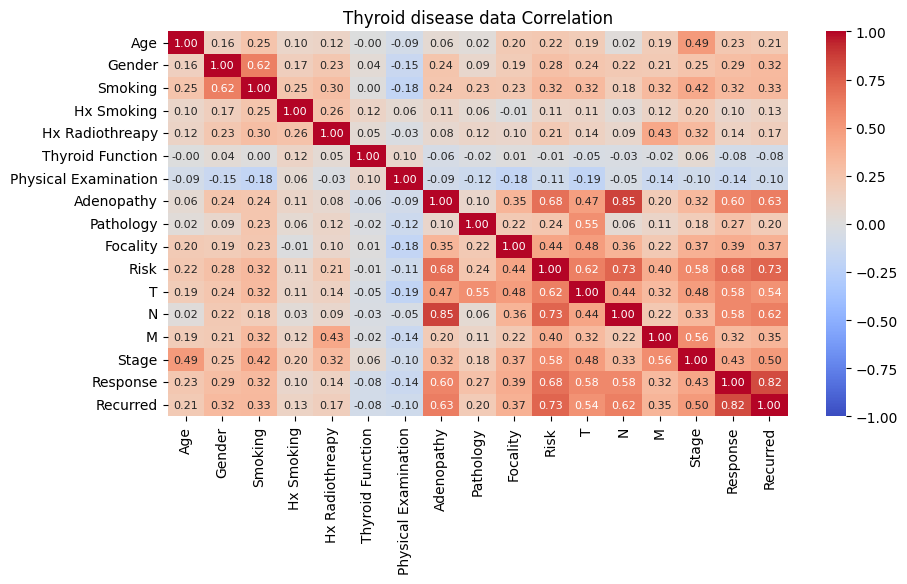

In [8]:
#sb.heatmap(cor1,annot=True,annot_kws={'size': 8})
plt.figure(figsize=(10, 5)) # width * height in inches
plt.title("Thyroid disease data Correlation")
sb.heatmap(cor1, annot=True, annot_kws={'size': 8}, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

#sb.heatmap(cor1, ...): This is the main function call. It tells seaborn to create a heatmap using the data in the variable cor1. 
# cor1 should contain a matrix of correlation values between different features.
#annot=True: This argument tells the heatmap to display the actual correlation values within each cell of the heatmap.
#annot_kws={'size': 8}: This argument defines the font size (8) of the correlation values within the heatmap cells.
#fmt=".2f": This argument specifies the format for displaying the correlation values. Here, it means to round the values to two decimal places.
#cmap='coolwarm': This argument specifies the colormap to use for the heatmap. 'coolwarm' uses a color scheme that goes from blue (low correlation) to red (high correlation).
#vmin=-1, vmax=1: These arguments set the minimum and maximum values for the color scale of the heatmap,
#ensuring that the range is from -1 (perfect negative correlation) to 1 (perfect positive correlation).


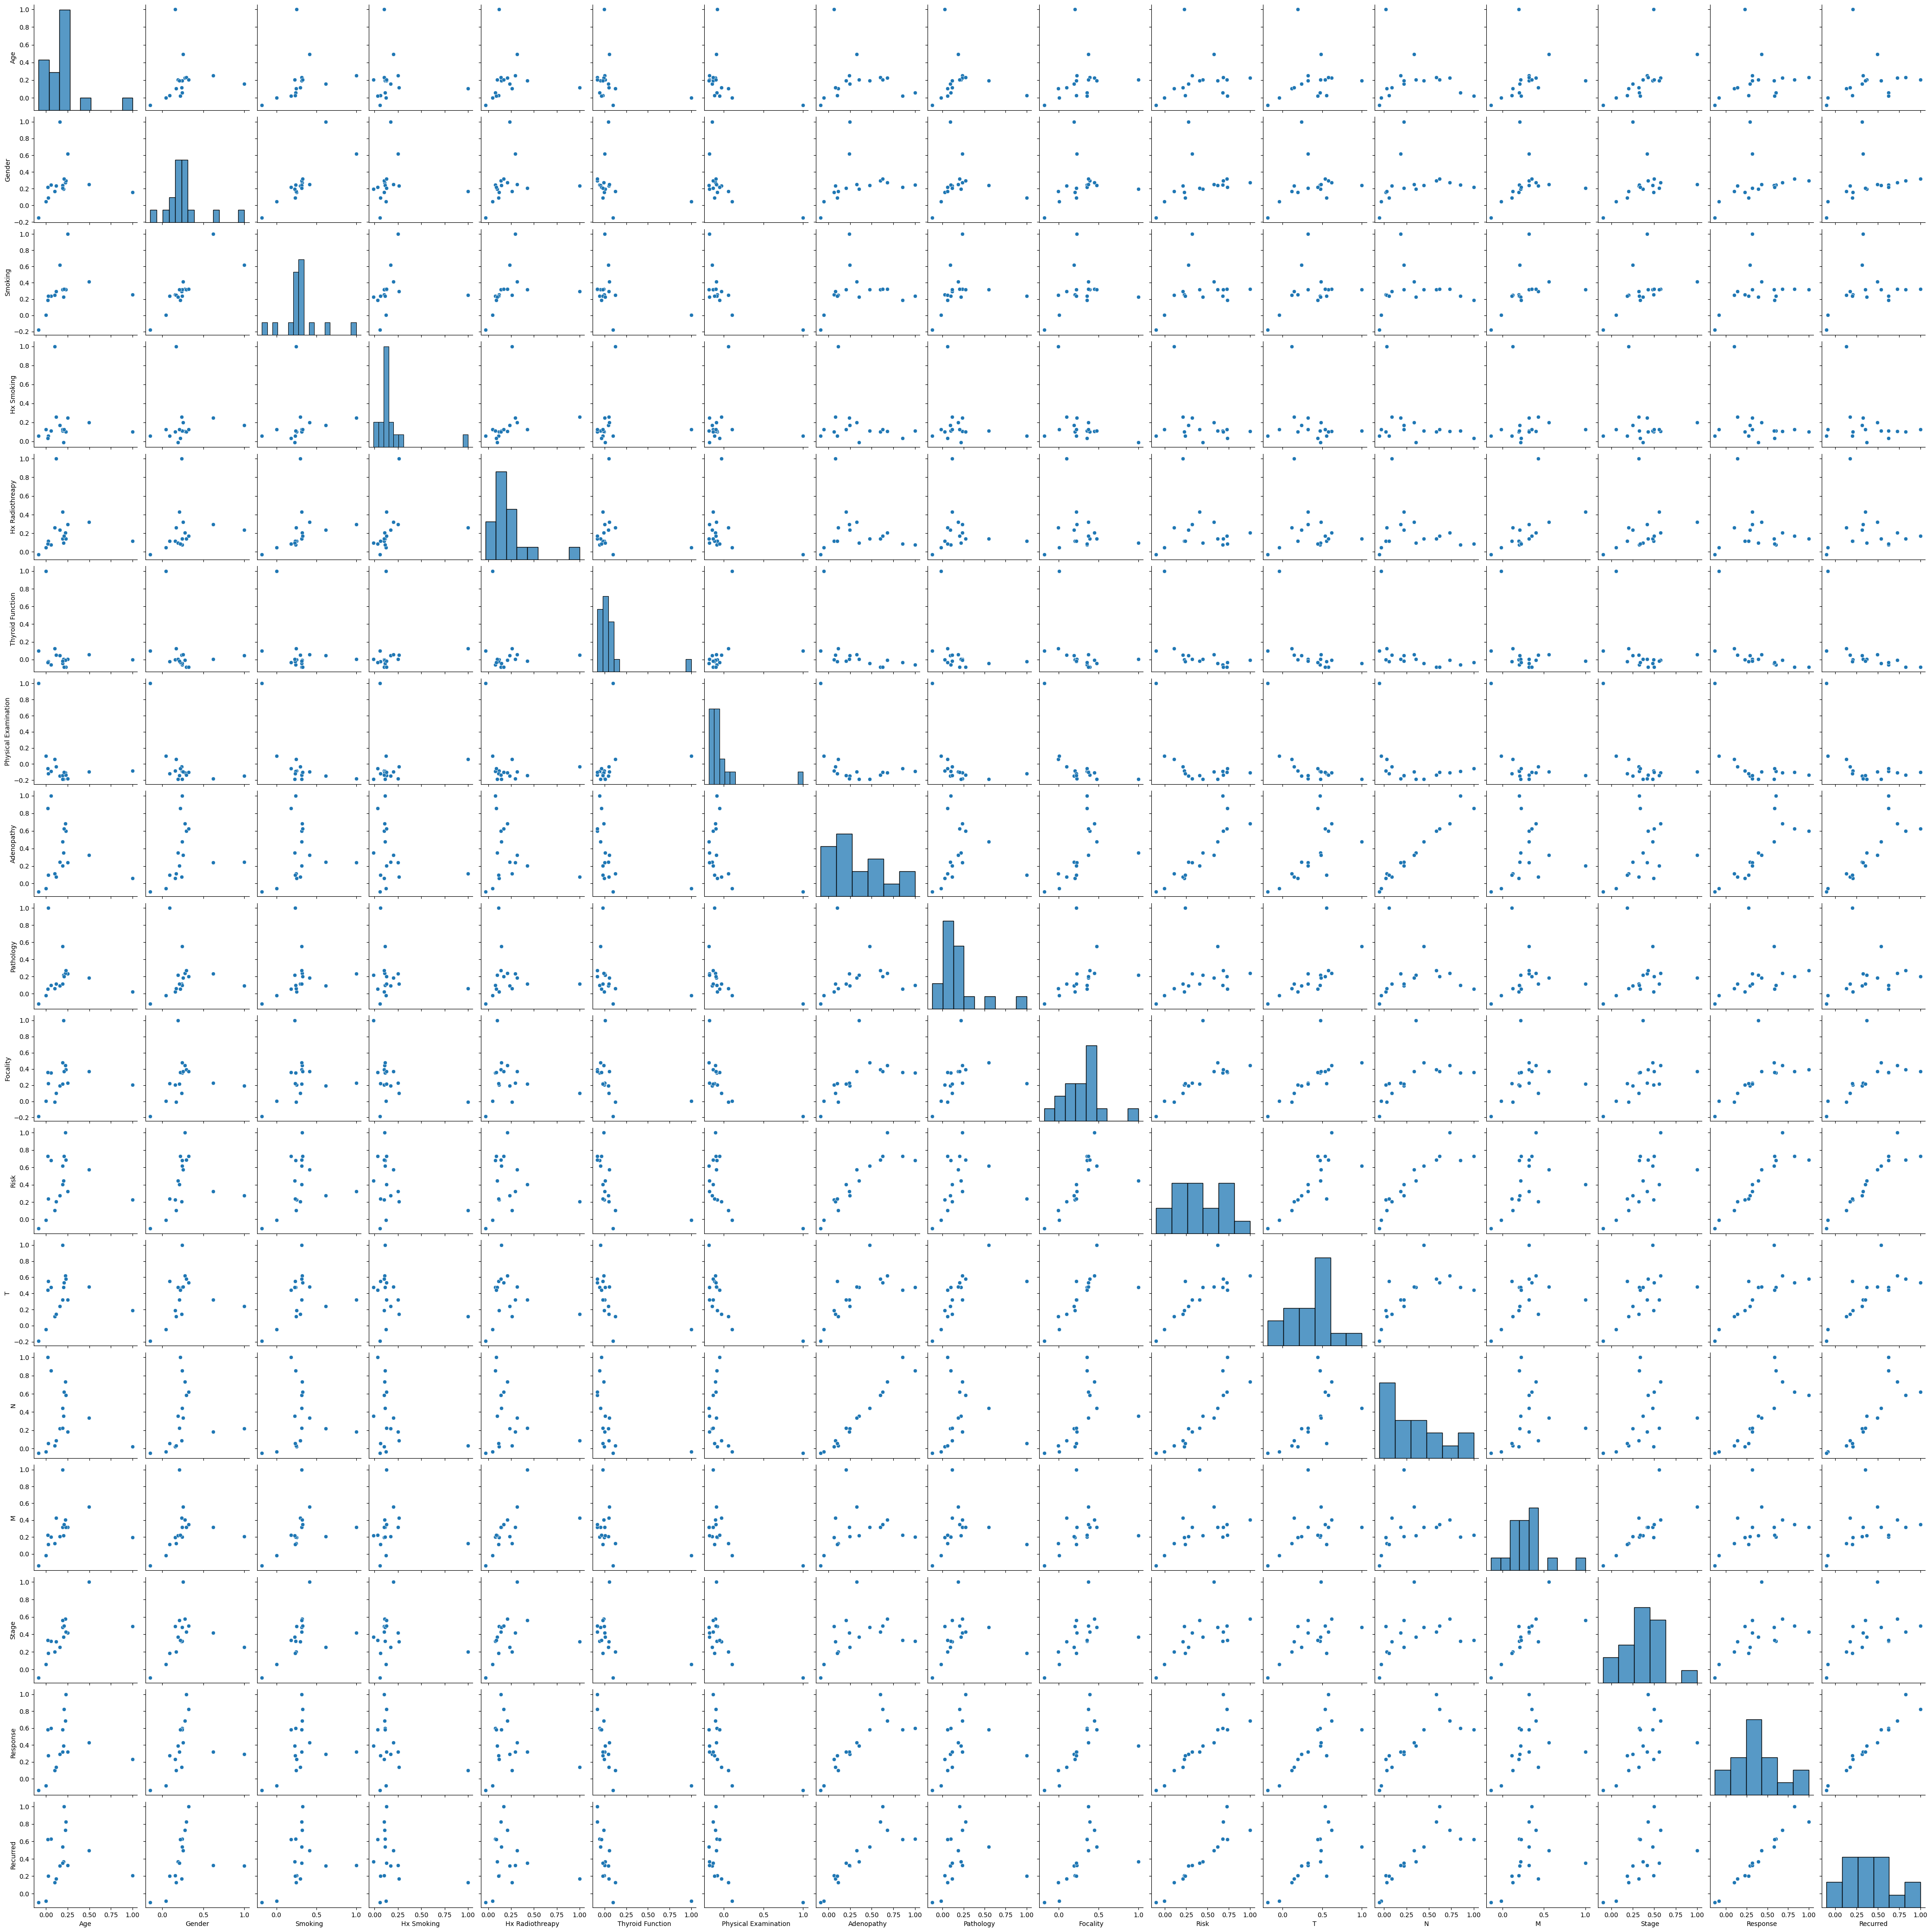

In [9]:
sb.pairplot(cor1)

In [10]:
"""thyroid2.plot(kind='scatter', x='Age', y='Risk')
plt.xlabel("Age")
plt.ylabel("Risk")
plt.title("Plot of Age Vs Risk")
plt.show()"""

'thyroid2.plot(kind=\'scatter\', x=\'Age\', y=\'Risk\')\nplt.xlabel("Age")\nplt.ylabel("Risk")\nplt.title("Plot of Age Vs Risk")\nplt.show()'

#### Note: Covariance tells us whether two variables are related and in what direction, while correlation gives us a clearer picture of how strong that relationship is.
#### Also it is very difficult to interpret the Covariance So Staticians gave us a new opportunity to see the correlation instead of Covariance (can also see the covariance in file 10Corr.ipynb)

#### **Correlation**
- Variables in a dataset can be related for a lot of reasons
#### **Types/parameters**
- Pearson  (For normal data or guassian distribution)
- Spearman's rho  (Used for non-normal distribution )
- Kendall's tau (Used for Ranking)

#### **_Examples:_**
- One variable could cause or depend on the values of another variable (Weight depends on how much food we take)
- One variable could be lightly associated with another variable ()
- Two variables could depend on a Third unknown variable


#### **_Types of Correlation:_**
- **Positive Correlation:** _ Both variables change in the same direction (eating more food causes more weight)
- **Neutral Correlation:** _ No relationship in the change of variables (eating more food causes no change in weight)
- **Negative Correlation:** _Variables change in oppossite direction (eating more food causes weight loss)

#### **Covariance**
-  The variables can be related by a linear relationship. This is a relationship that is consistently additive across 2 data samplers
-  This relationship can be summarized b/w 2 variables called the Covariance
-  The sign of Covariance can be interpreted as wether the 2 variables change in same (+ve) or opposite (-ve) direction
-  The magnitude of the Covariance is not easily interpreted. A Covariance value of Zero indicates that both variables are completely independent